In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors


grid_x = 8; # Forward
grid_y = 3; # Left


yaw = 43;
side_distance = 0.4



total block
25
left avg
0.08
right avg
0.12


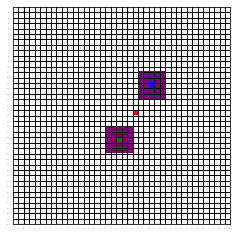

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors


grid_x = 19 # Forward
grid_y = 22 # Left


yaw = 60
side_distance = 0.3

map_width = 40
map_height = 40
resolution = 0.05

matrix_x = grid_x
matrix_y = grid_y

yaw_ros = yaw + 90
yaw_rad = yaw *math.pi/180

x_delta = side_distance * math.sin(yaw_rad)
x_disc = round(x_delta/resolution)

y_delta = side_distance * math.cos(yaw_rad)
y_disc = round(y_delta/resolution)

data = np.zeros(map_width * map_height).reshape(map_width, map_height)

EMPTY_CELL = 0
CURR_CELL = 1
LEFT_CELL = 2
RIGHT_CELL = 3
SURROUNDING_CELL = 4



data [matrix_x, matrix_y] = CURR_CELL

left_centre = np.array([matrix_x + x_disc, matrix_y - y_disc])
right_centre = np.array([matrix_x - x_disc, matrix_y + y_disc])


data [left_centre[0], left_centre[1]] = LEFT_CELL
data [right_centre[0], right_centre[1]] = RIGHT_CELL

block_size = 2
total_blocks = 0

left_counter = 0
right_counter = 0
for i in range(-block_size, block_size+1):
  for j in range(-block_size, block_size+1):
    left_counter += data [left_centre[0] + i, left_centre[1] + j]
    right_counter += data [right_centre[0] + i, right_centre[1] + j]
    data [left_centre[0] + i, left_centre[1] + j] = SURROUNDING_CELL
    data [right_centre[0] + i, right_centre[1] + j] = SURROUNDING_CELL
    total_blocks += 1

data [left_centre[0], left_centre[1]] = LEFT_CELL
data [right_centre[0], right_centre[1]] = RIGHT_CELL



left_avg = left_counter/total_blocks
right_avg = right_counter/total_blocks

print("total block") 
print(total_blocks)


print("left avg") 
print(left_avg)
print("right avg")
print(right_avg)


  



cmap = colors.ListedColormap(['white', 'red', 'green', 'blue', 'purple'])
bounds = [EMPTY_CELL, CURR_CELL, LEFT_CELL, RIGHT_CELL, SURROUNDING_CELL, SURROUNDING_CELL +1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)
# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(0.5, map_width, 1));
ax.set_yticks(np.arange(0.5, map_height, 1));
plt.tick_params(axis='both', labelsize=0, length = 0)
plt.show()
# fig.set_size_inches((8.5, 11), forward=False)
# plt.savefig(saveImageName + ".png", dpi=500)

# get pixel shift

